In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('./Downloads/Covvid.csv')

In [4]:
df

,Unnamed: 0,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,643,18,30,595,95,1,2
1,1,920,26,36,858,277,8,6
2,2,1406,42,39,1325,486,16,3
3,3,2075,56,49,1970,669,14,10
4,4,2877,82,58,2737,802,26,9
...,...,...,...,...,...,...,...,...
8814,8814,21209,121,11674,9414,678,5,569
8815,8815,15988,146,9959,5883,525,4,213
8816,8816,1691,483,833,375,10,4,36
8817,8817,4552,140,2815,1597,71,1,465


In [5]:
columns_to_drop=['Unnamed: 0']

In [6]:
df= df.drop(columns_to_drop, axis=1)

In [7]:
df

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,643,18,30,595,95,1,2
1,920,26,36,858,277,8,6
2,1406,42,39,1325,486,16,3
3,2075,56,49,1970,669,14,10
4,2877,82,58,2737,802,26,9
...,...,...,...,...,...,...,...
8814,21209,121,11674,9414,678,5,569
8815,15988,146,9959,5883,525,4,213
8816,1691,483,833,375,10,4,36
8817,4552,140,2815,1597,71,1,465


In [8]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,8.819000e+03,8819.000000,8.819000e+03,8.819000e+03,8819.000000,8819.000000,8819.000000
mean,8.344869e+04,4155.622066,3.907865e+04,4.021442e+04,1752.217712,69.558113,1041.307178
std,2.893659e+05,13965.573695,1.232905e+05,1.755921e+05,5801.191700,220.384692,4018.099953
min,1.000000e+01,1.000000,1.000000e+00,6.000000e+00,1.000000,-217.000000,-16298.000000
25%,2.907500e+03,65.000000,7.150000e+02,1.367500e+03,77.000000,2.000000,28.000000
50%,1.217800e+04,288.000000,4.095000e+03,5.385000e+03,290.000000,7.000000,122.000000
75%,4.923100e+04,1443.500000,2.044000e+04,2.064950e+04,937.500000,27.500000,545.500000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.000000,3887.000000,140050.000000


<Axes: >

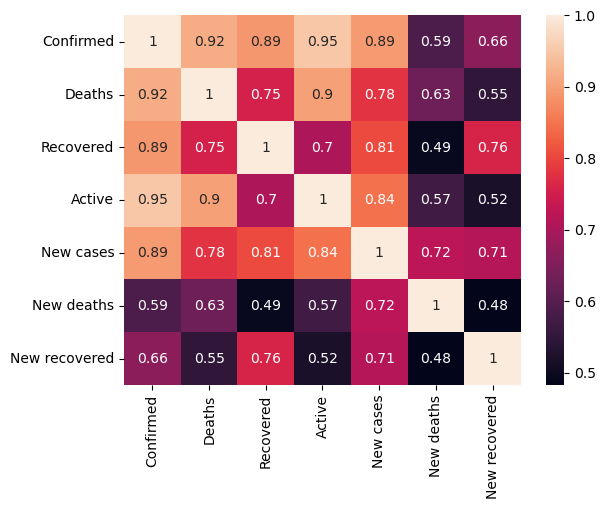

In [9]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oem/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


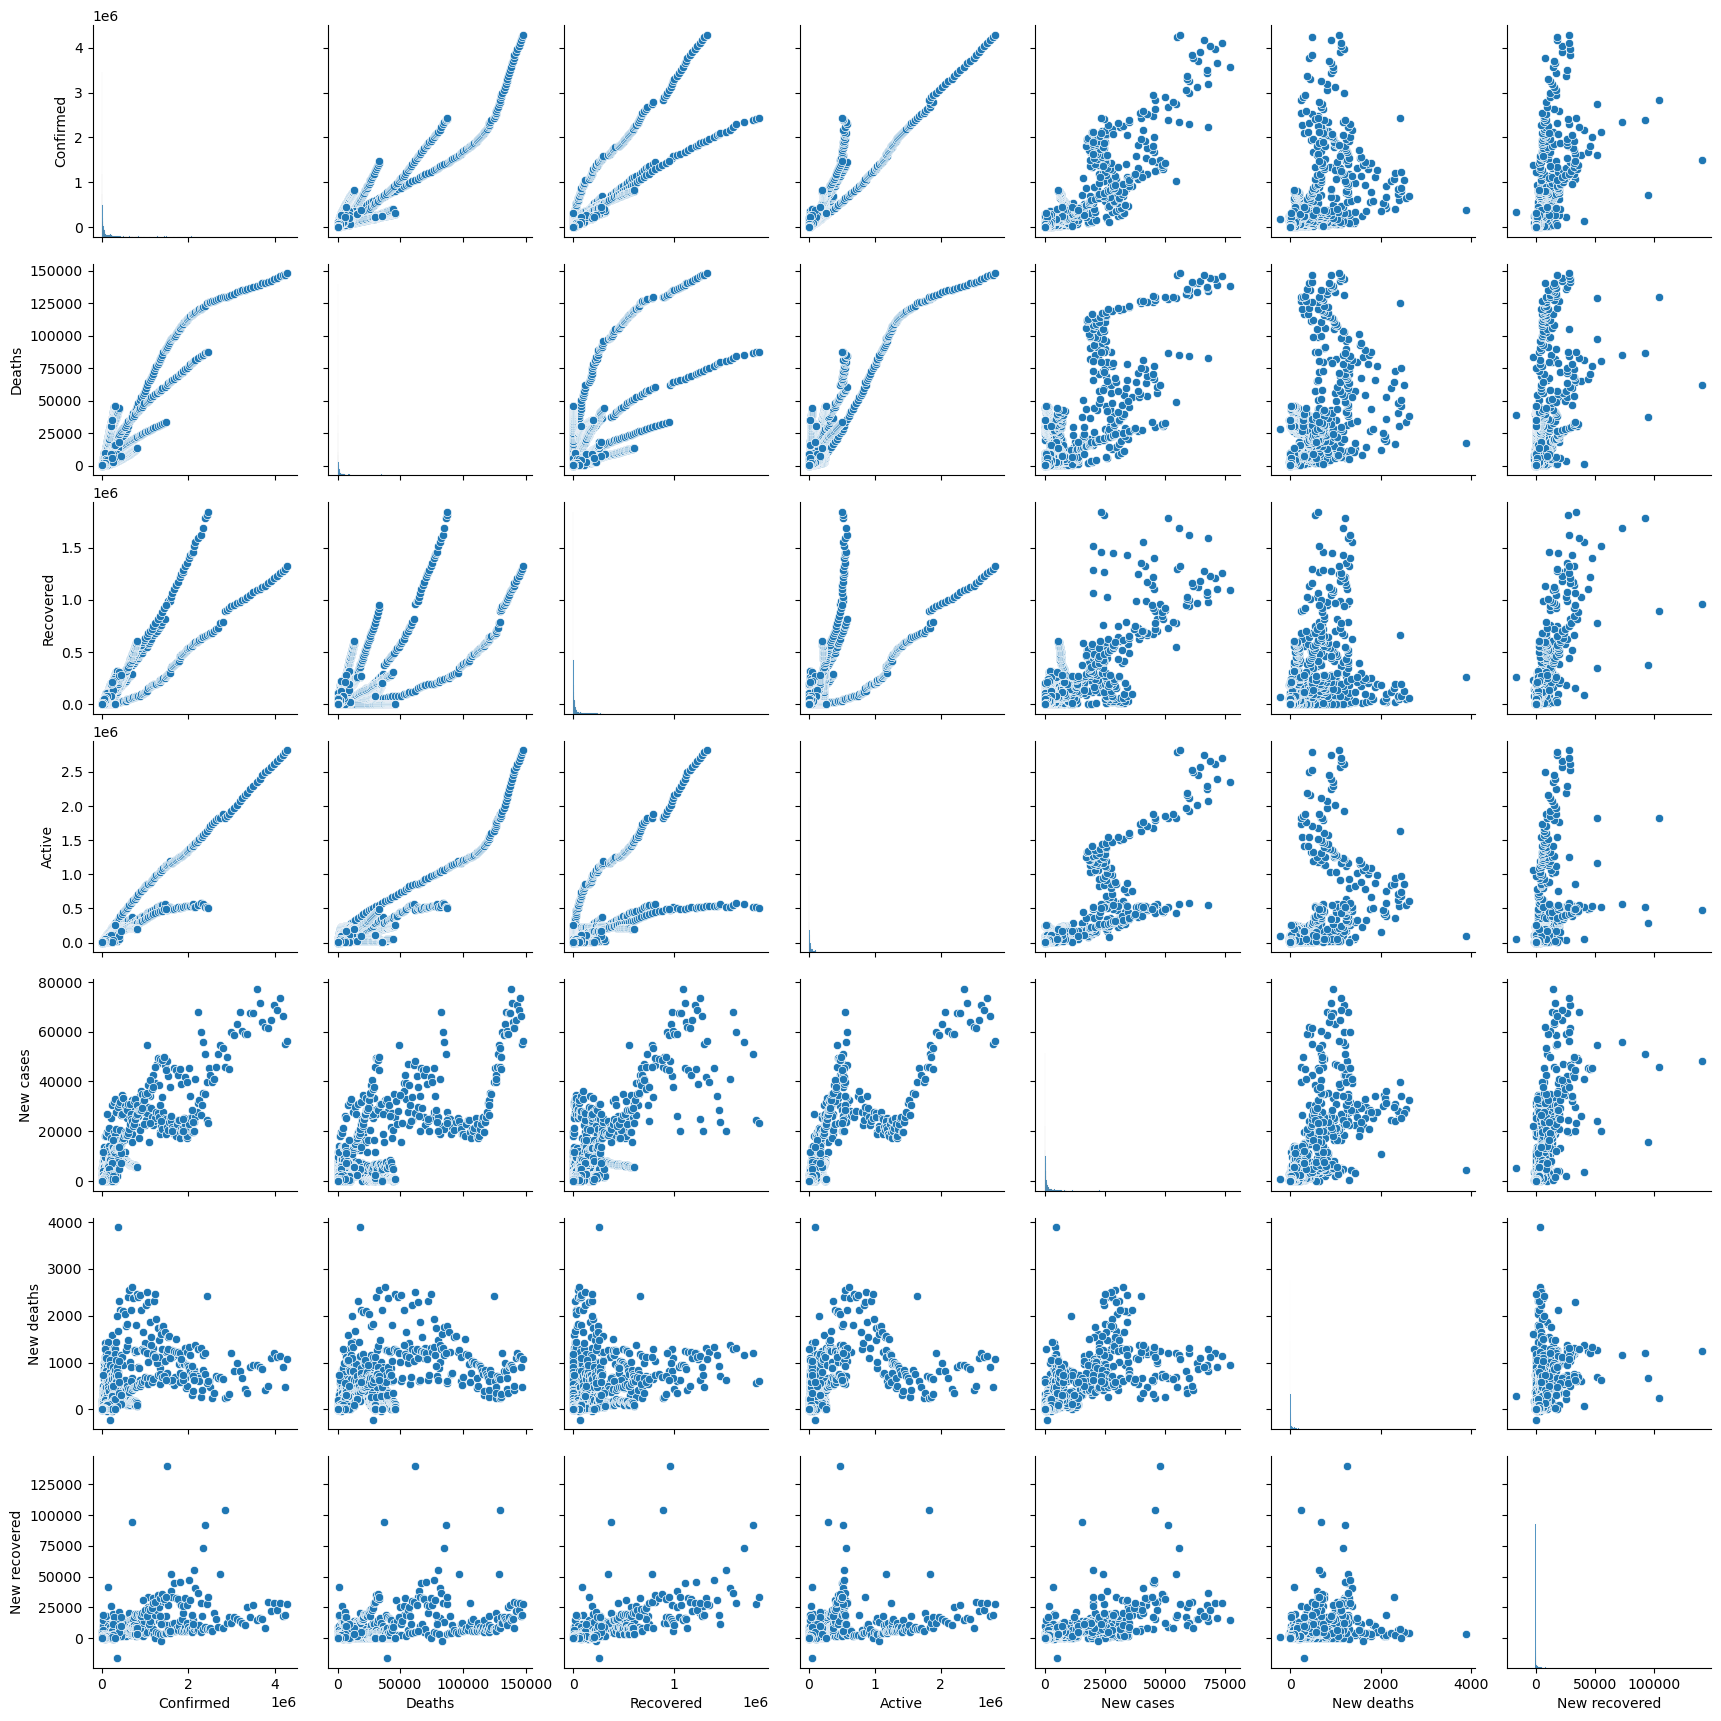

In [10]:
sns.pairplot(df)

In [11]:
scaling= StandardScaler()
scaled = scaling.fit_transform(df)

In [12]:
scaled_df=pd.DataFrame(scaled,columns=df.columns)
#scaled dataset
scaled_df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,-0.286179,-0.296290,-0.316739,-0.225646,-0.285685,-0.311101,-0.258671
1,-0.285222,-0.295717,-0.316690,-0.224148,-0.254310,-0.279337,-0.257675
2,-0.283542,-0.294571,-0.316666,-0.221489,-0.218281,-0.243035,-0.258422
3,-0.281230,-0.293569,-0.316585,-0.217815,-0.186734,-0.252110,-0.256680
4,-0.278458,-0.291707,-0.316512,-0.213447,-0.163806,-0.197657,-0.256929


/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' 

<function matplotlib.pyplot.show(close=None, block=None)>

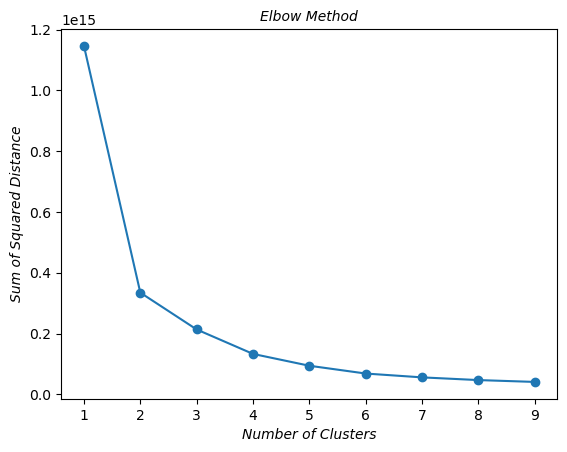

In [13]:
a=[]
K=range(1,10)
for i in K:
    Kmean= KMeans(n_clusters=i)
    Kmean.fit(df)
    a.append(Kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method', fontsize=10, fontstyle='italic')
plt.xlabel('Number of Clusters', fontsize=10, fontstyle='italic')
plt.ylabel('Sum of Squared Distance', fontsize=10, fontstyle='italic')
plt.show

In [17]:
Kmeans = KMeans(n_clusters=2, random_state=111)
Kmeans.fit(scaled_df)

/home/oem/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=111)

In [18]:
pd.Series(Kmeans.labels_).value_counts()

0    8630
1     189
Name: count, dtype: int64

In [19]:
metrics.silhouette_score(scaled_df, Kmeans.labels_)

0.9221253558222908